In [111]:
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot, patches
import numpy as np
plt.style.use('fivethirtyeight')


import os
import networkx as nx
from networkx.algorithms import bipartite
from networkx.utils import groups
import pandas as pd
from collections import defaultdict

import zipfile
import requests
import io

# functions to help read in add health data
# (which is assumed to be stored under data/)
import sbms.sbms as sbms

## Stochastic block model

In [112]:
# number of nodes in each group/block
block_sizes = [100, 200, 100, 200]
# stochastic block matrix
block_probs  = [ [0.4, 0.2, 0.2, 0.2],
                 [0.2, 0.4, 0.2, 0.2],
                 [0.2, 0.2, 0.4, 0.2],
                 [0.2, 0.2, 0.2, 0.4] ]

In [113]:
g = nx.stochastic_block_model(block_sizes, block_probs)

The nodes have an attribute with the index of their block:

In [114]:
nx.get_node_attributes(g, 'block')

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

Here's a helper function we can use to count the number of edges between the blocks:

In [115]:
sbms.get_block_stats(g)

Edge table:
      0     1     2     3
0  2018  3978  2092  4008
1  3978  8072  4050  8035
2  2092  4050  2047  4046
3  4008  8035  4046  7952


Let's use this info to check a couple of our formulas. 

In lecture, we said that the expected number of edges from group 0 to itself should be

$$
\frac{n_0~(n_0-1)}{2}p_{0,0} = \frac{100*99}{2}\times 0.4
$$

In [116]:
((100*99)/2)*.4

1980.0

Pretty close!

Let's also check the number of expected edges between, say, group 2 and group 3. This should be

$$
n_2~n_3~p_{23} = 100 \times 200 \times 0.2
$$

In [117]:
100*200*0.2

4000.0

Again, looks pretty close

Let's see if we can visualize the network in a helpful way:

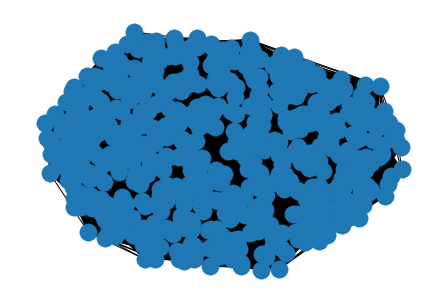

In [118]:
nx.draw(g)

It's kind of hard to tell what is going on!

<https://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html> is helpful

We have a helper function (loaded above) called `draw_adjacency_matrix` which can potentially help visualize the structure of a block model.

Recall that an adjacency matrix is a big table showing which pairs of nodes are connected with an edge. Entry $(i,j)$ of the adjacency matrix is 0 if there is no edge and 1 if there is an edge between nodes $i$ and $j$.

This plot will draw the adjacency matrix as an image, where a dark square means the matrix entry is 1 (i.e., there is an edge) and a light square means the matrix entry is 0 (i.e., there is no edge).

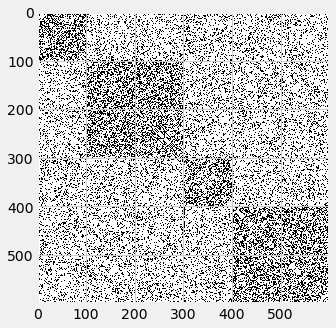

In [120]:
sbms.draw_adjacency_matrix(g)

We can see that there is a greater density of edges within the blocks (which makes sense, given the parameters we chose for the block matrix)

### Another example: community structure

In [121]:
p_w = 0.4 # within-group prob
p_o = 0.01 # outside-group prob

# number of nodes in each group/block
block_sizes = [100, 200, 100, 200]
# stochastic block matrix
block_probs  = [ [p_w, p_o, p_o, p_o],
                 [p_o, p_w, p_o, p_o],
                 [p_o, p_o, p_w, p_o],
                 [p_o, p_o, p_o, p_w] ]

In [122]:
g = nx.stochastic_block_model(block_sizes, block_probs)

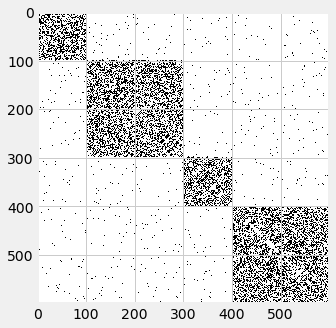

In [123]:
draw_adjacency_matrix(g)

When there is very strong structure to the blocks in this way, sometimes researchers will lay the network nodes out to illustrate it. The `visualize_blocks` helper function can do this for us:

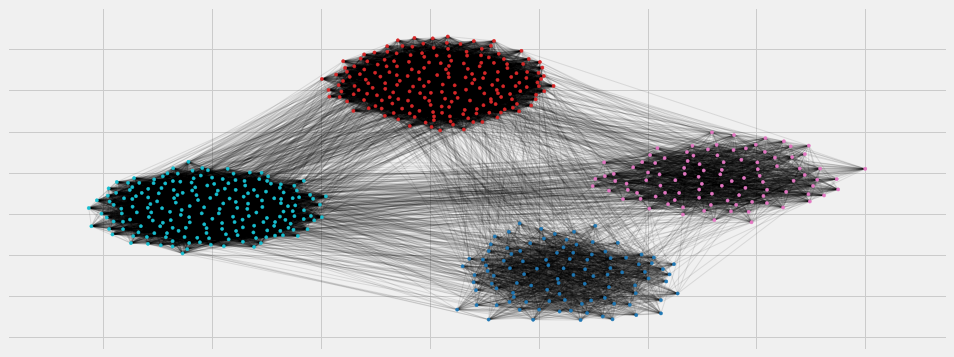

In [124]:
fig, ax = plt.subplots(1, figsize=(15, 20))
visualize_blocks(g, edge_alpha=.1, node_size=10)

### Disassortative  example

In [125]:
p_w = 0.01 # within-group prob
p_o = 0.2 # outside-group prob

# number of nodes in each group/block
block_sizes = [100, 200, 100, 200]
# stochastic block matrix
block_probs  = [ [p_w, p_o, p_o, p_o],
                 [p_o, p_w, p_o, p_o],
                 [p_o, p_o, p_w, p_o],
                 [p_o, p_o, p_o, p_w] ]

In [126]:
g = nx.stochastic_block_model(block_sizes, block_probs)

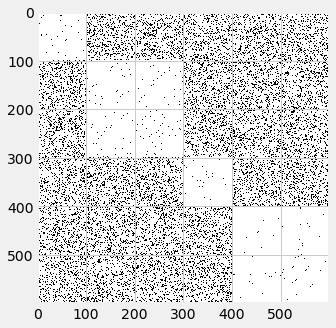

In [127]:
draw_adjacency_matrix(g)

In this case, edges are mostly between groups, with very few edges within a group. This case is approaching something like a *multi-partite network* -- i.e., a generalization of a bi-partite network in which nodes can be partitioned into different groups with all edges going between different groups. (A bi-partite network is the same but with only two groups.)

## Hierarchical example

In [128]:
p_h = 0.3

# number of nodes in each group/block
block_sizes = [100, 200, 200, 200]
# stochastic block matrix
block_probs  = [ [0,   p_h, 0,   0  ],
                 [p_h, 0,   p_h, 0  ],
                 [0,   p_h, 0,   p_h],
                 [0,   0,   p_h,   0] ]

In [129]:
g = nx.stochastic_block_model(block_sizes, block_probs)

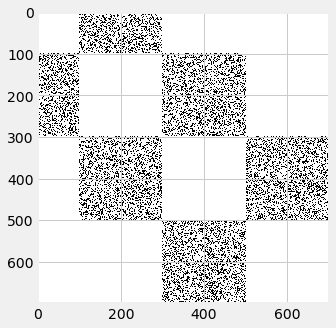

In [130]:
draw_adjacency_matrix(g)

This produces a kind of hierarchical structure...

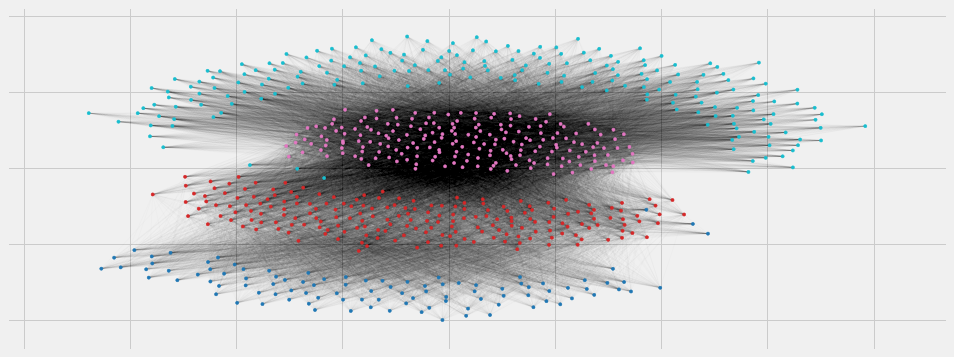

In [131]:
fig, ax = plt.subplots(1, figsize=(15, 20))
visualize_blocks(g, edge_alpha=.01, node_size=10)

### ER  example

Finally, note that if all of the entries in the block matrix are the same, then the model is essentially an Erdos-Renyi random network model

In [132]:
p_w = 0.1 # within-group prob
p_o = 0.1 # outside-group prob

# number of nodes in each group/block
block_sizes = [100, 200, 100, 200]
# stochastic block matrix
block_probs  = [ [p_w, p_o, p_o, p_o],
                 [p_o, p_w, p_o, p_o],
                 [p_o, p_o, p_w, p_o],
                 [p_o, p_o, p_o, p_w] ]

In [133]:
g = nx.stochastic_block_model(block_sizes, block_probs)

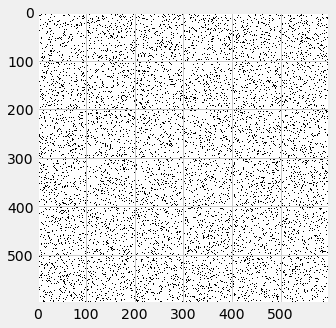

In [134]:
draw_adjacency_matrix(g)

In this case, the node layout algorithm doesn't work as well - this is a hint that it's hard to find these groups without knowing them in advance. We'll talk about that in a future class!

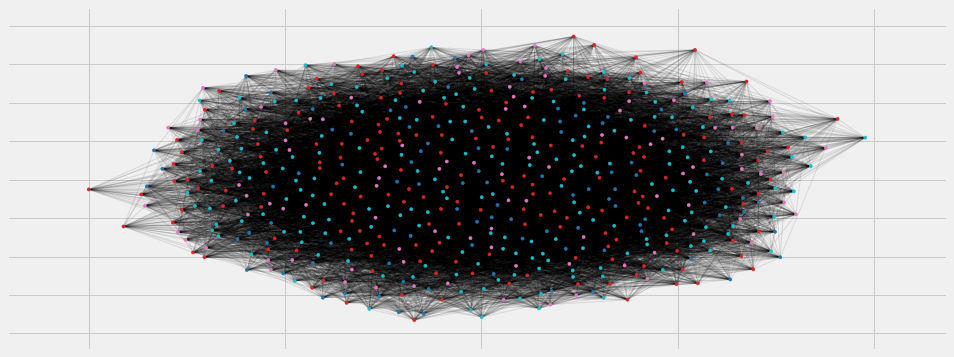

In [135]:
fig, ax = plt.subplots(1, figsize=(15, 20))
visualize_blocks(g, edge_alpha=.1, node_size=10)